#**Bank Marketing with Machine Learning**

##**Introduction**

###**Using Machine Learning to Predict Subscription to Bank Term Deposits for Clients with Scikit-Learn**

What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

Marketing Introduction:

The process by which companies create value for customers and build strong customer relationships in order to capture value from customers in return

Background

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) was subscribed or not. Data set has 20 predictor variables (features) and around 41K rows. Top 10 rows of the dataset is shown below

##Type of Machine Learning problem:
As you would have probably guess it by now, this is a binary classification problem. Our two classes are “yes” denoting that the customer subscribed to a term deposit, and “no” denoting that the customer did not subscribe.

#**Dataset**

# **Attributes Description:**

**A. bank client data:**

1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual.

**B. Related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day of the week (numerical 1, 2)

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**C.Related with the last contact of the current campaign:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**D. Social and economic context attributes:**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Source:https://archive.ics.uci.edu/ml/machine-learning-databases/00222/ 

Dataset has 40,000+ rows of data.

### In this project I will demonstrate how to build a model predicting clients subscribing to a bank's term deposit in Python using the following steps:

-data exploration

-feature engineering

-building training/validation/test samples

-model selection

-model evaluation

**Project Definition**

The classification goal is to predict if a client will subscribe to the bank term deposit (yes/no).

# **Data Exploration**

I started by importing the pandas package which is used for manupulation of data. Then, I loaded the dataset into the dataframe (df).

In [ ]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload() #uploaded from google drive

Saving bank.csv to bank (1).csv


In [ ]:
import pandas as pd
import seaborn as sns
#load the CSV file
df = pd.read_csv('bank.csv')

#df = pd.read_csv('C:/Users/shali/Desktop/INFO 7390/Assignment1/bank.csv')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
#I created a column called OUTPUT_LABEL which is going to represent 0 for the negative class and 1 for the positive class based on the bank marketing data set.

df['OUTPUT_LABEL'] = (df.deposit == 'yes').astype('int')

The prevalence of the positive class is calculated here...

In [ ]:

def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))


In [ ]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.474


The prevlence of the positive class is 47.4% which means that the proportion of people who agreed to a term deposit (positive class) compared to the people who did not is 47.4%.

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,OUTPUT_LABEL
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


Exploring the Data summary

* The Mean age of the Customer is 41 years(Minimum 18 years old and Maximum 95 years old)
* The mean balance is 1,528. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.

* As the data information said it will be better to drop the duration column since duration is highly correlated in whether a potential client will buy a term deposit. Also, duration is obtained after the call is made to the potential client so if the target client has never received calls this feature is not that useful. The reason why duration is highly correlated with opening a term deposit is because the more the bank talks to a target client the higher the probability the target client will open a term deposit since a higher duration means a higher interest (commitment) from the potential client.

**Checking the column with null data**

In [ ]:
 #checking the null values
df.info() 

#Now that we have confirmed no values are missing, we can start with the visual exploration:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           11162 non-null  int64 
 1   job           11162 non-null  object
 2   marital       11162 non-null  object
 3   education     11162 non-null  object
 4   default       11162 non-null  object
 5   balance       11162 non-null  int64 
 6   housing       11162 non-null  object
 7   loan          11162 non-null  object
 8   contact       11162 non-null  object
 9   day           11162 non-null  int64 
 10  month         11162 non-null  object
 11  duration      11162 non-null  int64 
 12  campaign      11162 non-null  int64 
 13  pdays         11162 non-null  int64 
 14  previous      11162 non-null  int64 
 15  poutcome      11162 non-null  object
 16  deposit       11162 non-null  object
 17  OUTPUT_LABEL  11162 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 1.5+ MB


In [ ]:
print(df['deposit'].value_counts()) #checking the count of deposit and the count of yes and no are balanced

no     5873
yes    5289
Name: deposit, dtype: int64


In [ ]:
#checking categorical variables count
print(df["job"].value_counts())
print("*"*25)
print(df["marital"].value_counts())
print("*"*25)
print(df["education"].value_counts())
print("*"*25)
print(df["contact"].value_counts())


management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
*************************
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
*************************
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
*************************
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64


## **Key Observations**

- From the output of the code, we can see that there are roughly the same amount of categorical and numeric values in the columns.

- age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed are numerical variables.

- All the data inputted are non-null values, meaning that we have a value for every column.

- Output (y) has two values: "yes" and "no".

- default, housing and loan have 3 values each (yes, no and unknown).

- We are discarding duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# **Feature Engineering**

Feature Engineering is classifying features such as numerial and categorical into groups in order to deeply section and analyze the data for results in machine learning algorithms.In this section, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical and categorical features.

### **Numerical Features**

These are numeric data. The numerical columns that we will use can be seen below

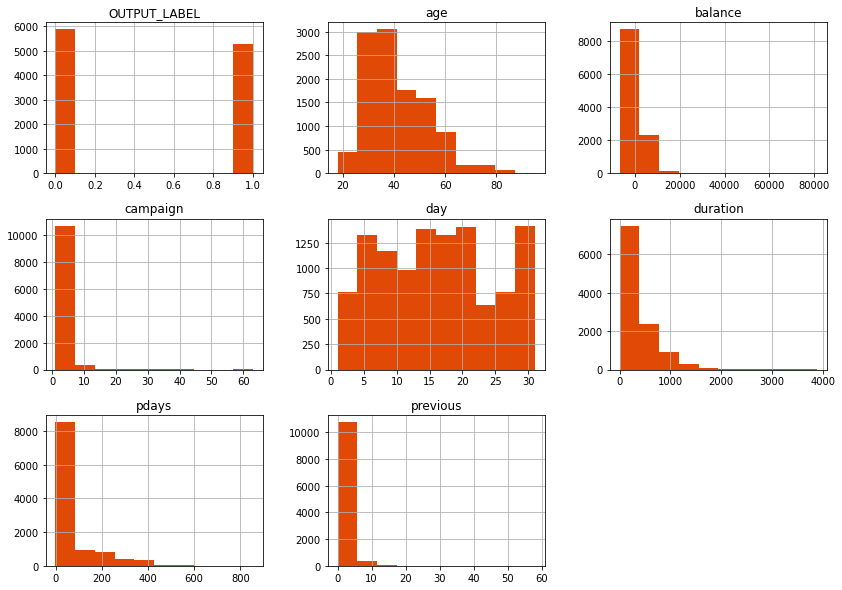

In [ ]:
# Let's see how the numeric data is distributed.

df.hist(bins=10, figsize=(14,10), color='#E14906')
plt.show()

Let's check if there are any missing values in the numerical data.

In [ ]:
# There are more nos than yes for deposit but there is no much difference between the numbers. 
df["deposit"].value_counts()
#df.head() as per 

no     5873
yes    5289
Name: deposit, dtype: int64

#**Categorical Features**

##**One-Hot Encoding**
 To convert our categorical features to numbers, we will use a technique called one-hot encoding. In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. For example, for the column job, we would create new columns.

In [ ]:
df_bank = df.copy() #copy the original dataframe

In [ ]:
## Convert the columns that contain a Yes or No. (Binary Columns)

#Create dummy variable for the categorical data and drop first column to avoid dummy varibale trap
term_deposit = pd.get_dummies(df_bank,columns = ['job','marital','education',
                                'month','poutcome','contact','housing','loan','default','deposit'], drop_first = True)

term_deposit.rename(columns = {'job_blue-collar':'job_blue_collar'}, inplace = True)
term_deposit.rename(columns = {'job_self-employed':'job_self_employed'}, inplace = True)

term_deposit.head(5)



,age,balance,day,duration,campaign,pdays,previous,OUTPUT_LABEL,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,contact_telephone,contact_unknown,housing_yes,loan_yes,default_yes,deposit_yes
0,59,2343,5,1042,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1
1,56,45,5,1467,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1
4,54,184,5,673,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1


##**Graphical Representation of Categorical Features**

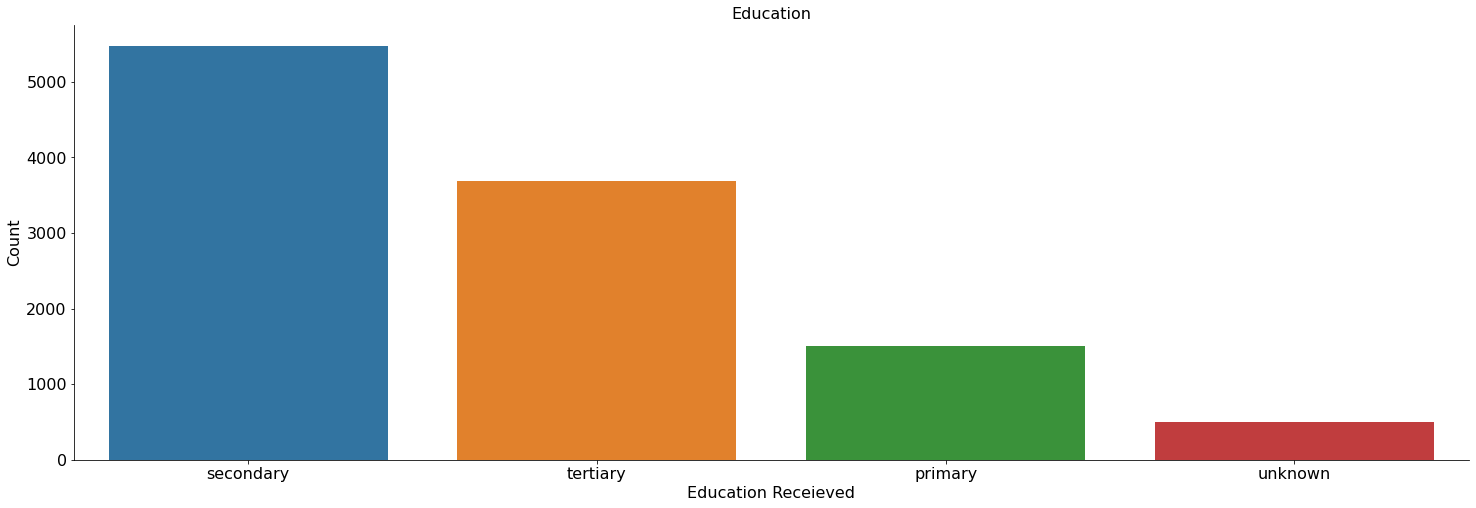

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

From the above plot we can see customer who is in secondary education have more population than other category

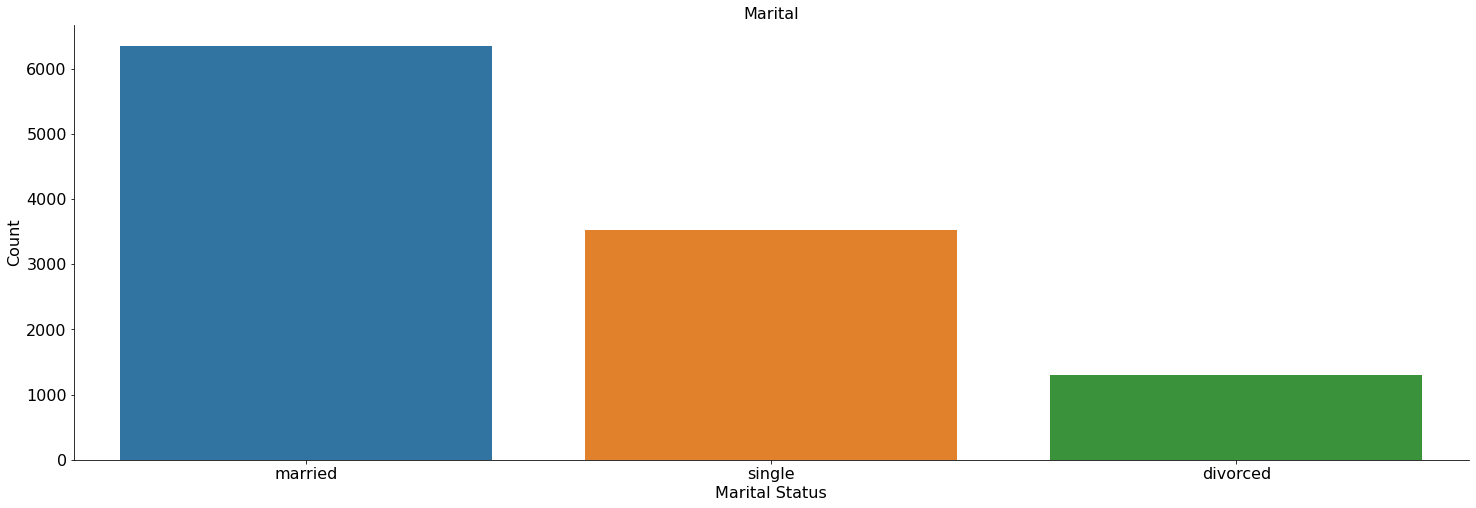

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df)
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

As per the plot above we can see customer who are married has more population than single

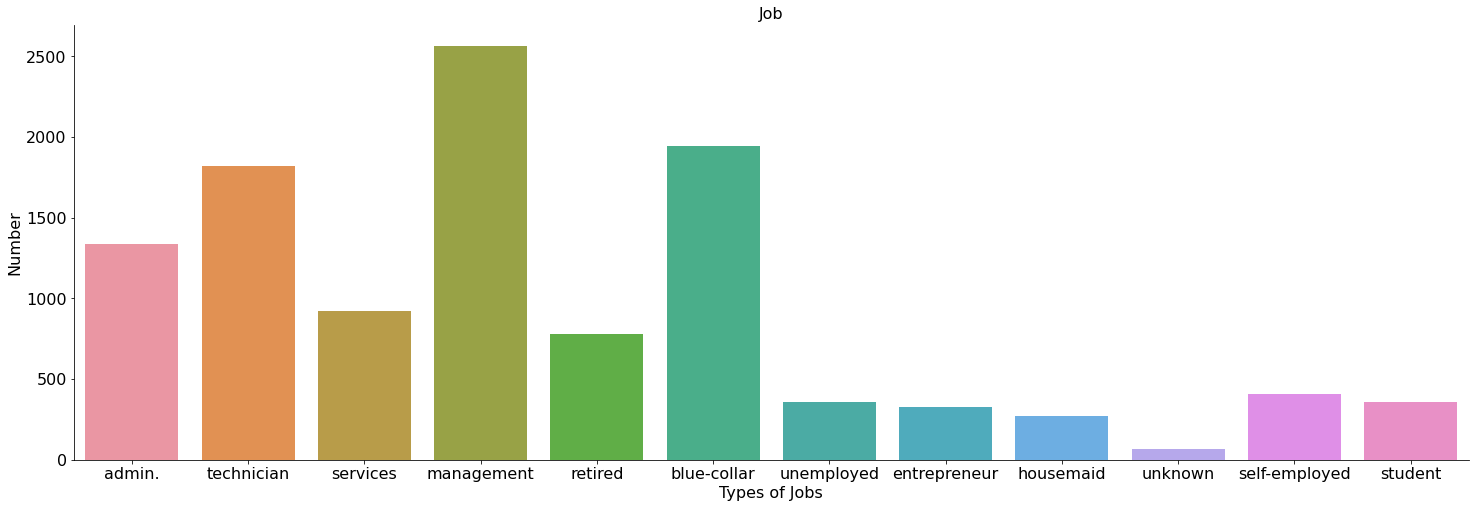

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

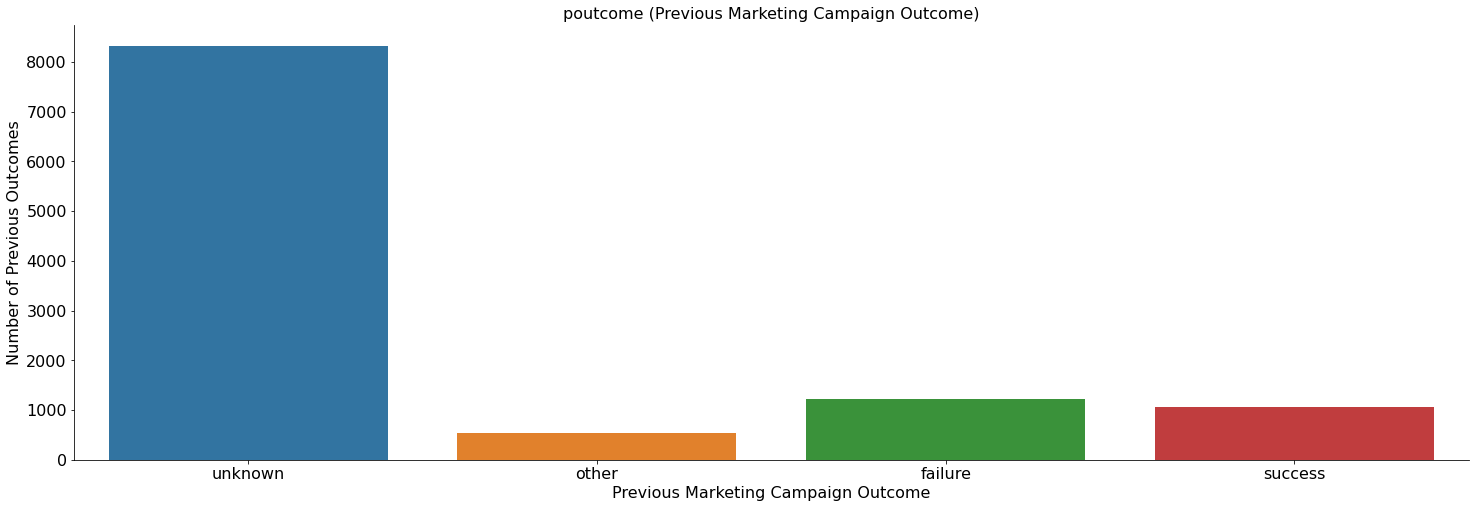

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df)
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

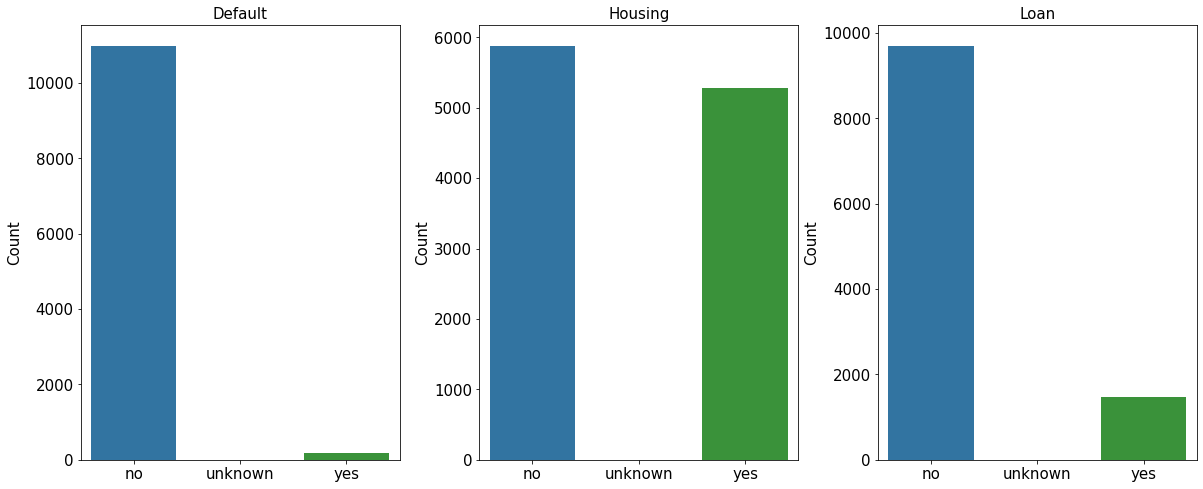

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

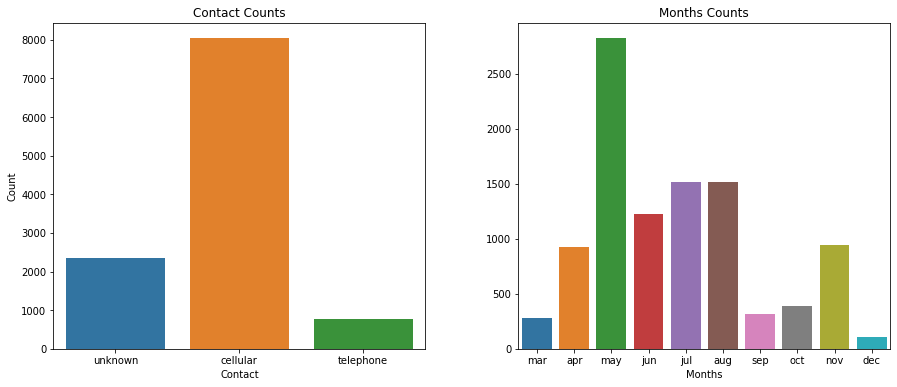

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.countplot(df['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)



plt.subplots_adjust(wspace=0.25)

Data check for missing values

In [ ]:
term_deposit.isnull().sum().sort_values(ascending = False)
term_df =term_deposit.drop(['duration'],axis=1)

# Move the deposit column to the first column.
dep = term_df['deposit_yes']
#Drop the deposit column
term_df.drop(labels=['deposit_yes'], axis=1,inplace = True)
term_df.insert(0, 'deposit', dep)
term_df.head()

term_df

,deposit,age,balance,day,campaign,pdays,previous,OUTPUT_LABEL,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,contact_telephone,contact_unknown,housing_yes,loan_yes,default_yes
0,1,59,2343,5,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
1,1,56,45,5,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,1,41,1270,5,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
3,1,55,2476,5,1,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
4,1,54,184,5,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0,33,1,20,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
11158,0,39,733,16,4,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
11159,0,32,29,19,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
11160,0,43,0,8,2,172,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


The training (df_train_all), validation (df_valid) and test (df_test) set were created below.

##**Correlation matrix of numerical features**

Text(0.5, 1.05, 'Pearson correlation of Features')

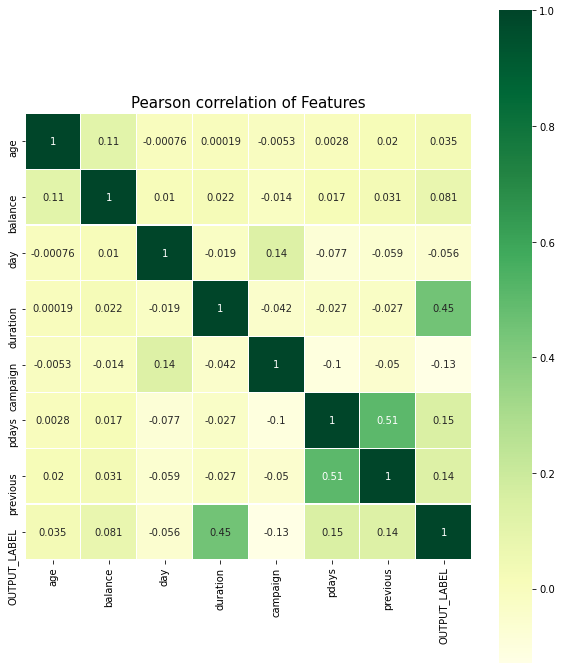

In [ ]:

corr = df_bank.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

The above heatmap shows us a correlation between the various features. The closer the value to 1, the higher is the correlation between the pair of features.

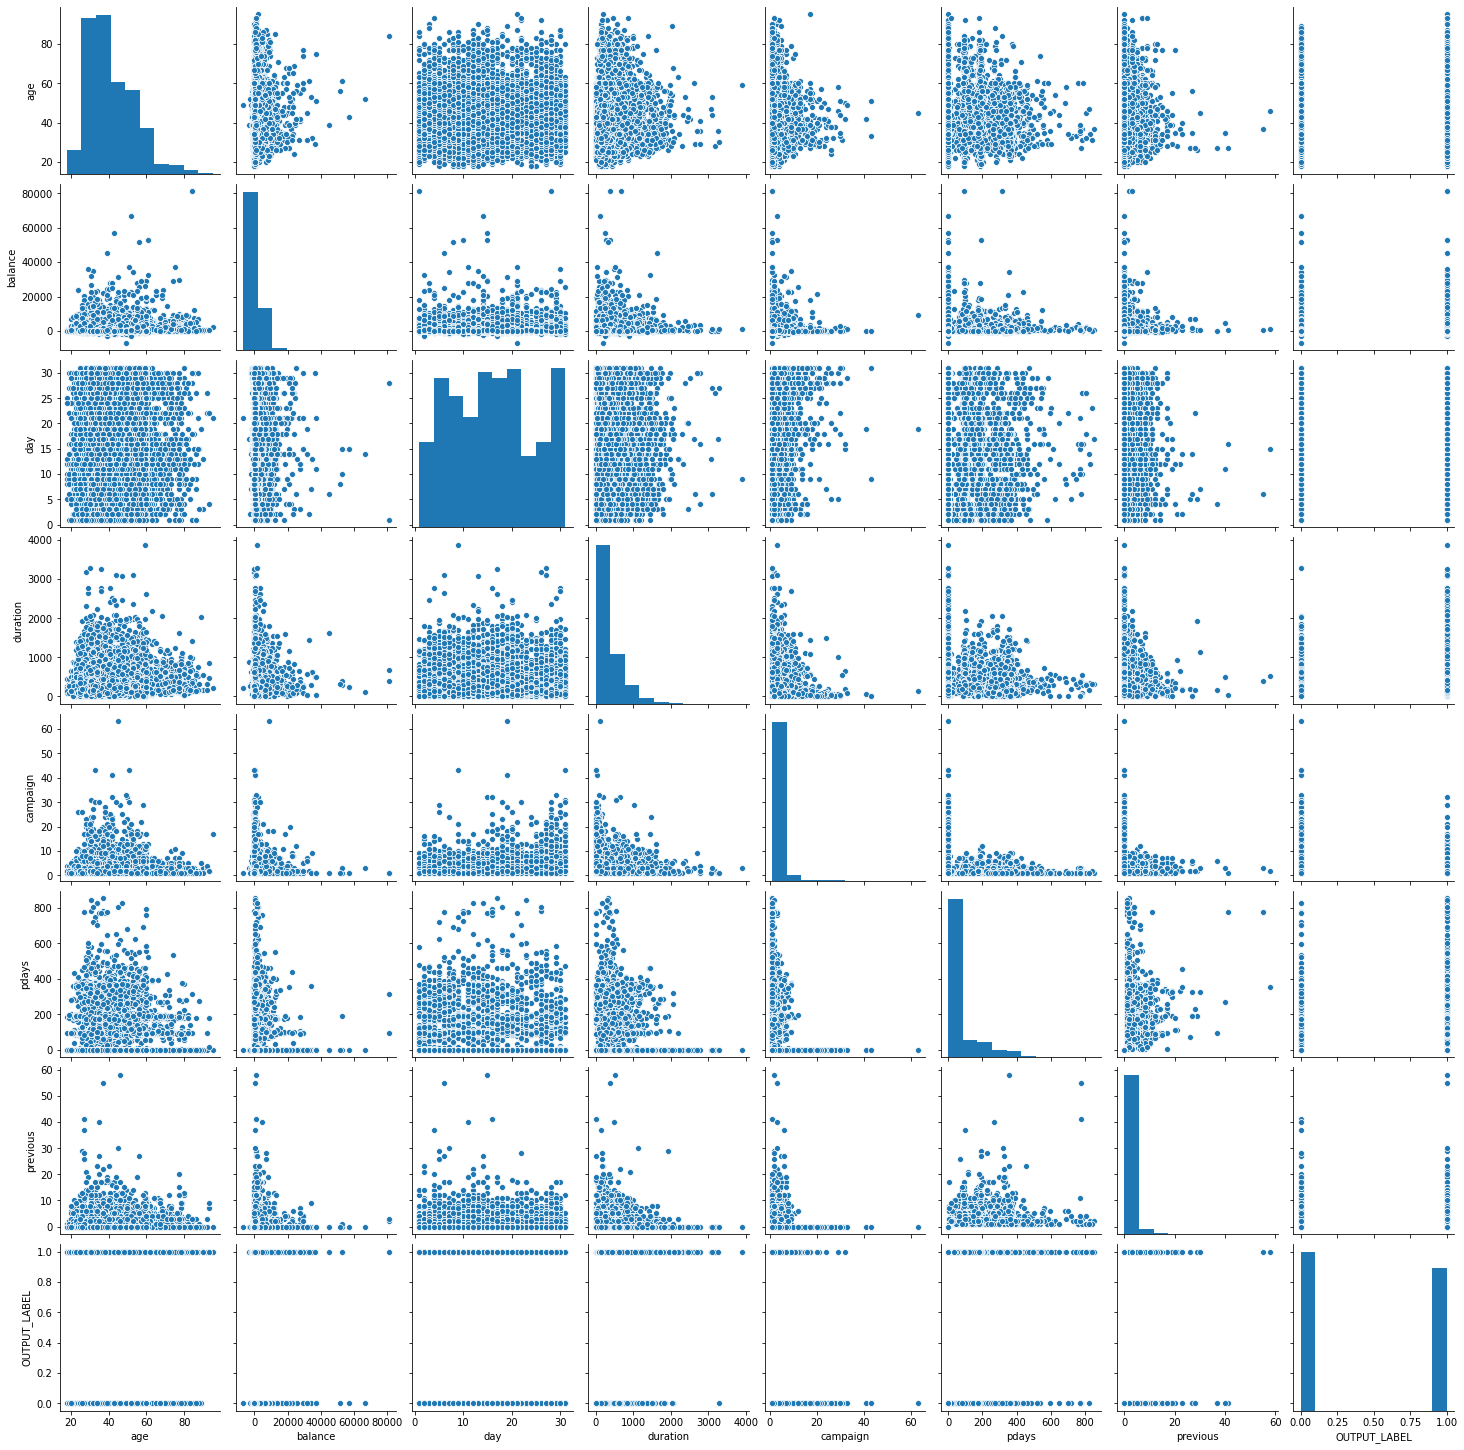

In [ ]:
sns.pairplot(df_bank)

#Is there any multicollinearity in the model?


From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g pdays and previous these features share a correlation value of 0.51 which is very high compared to the other features that we see in the heatmap.

In [ ]:
results = smf.logit('deposit~ age + default_yes + balance + housing_yes + loan_yes + day  + campaign + pdays + previous + job_entrepreneur + job_blue_collar + job_self_employed +job_housemaid + job_management + job_retired + job_services + job_student + job_technician + job_unemployed +  job_unknown + marital_married + marital_single + education_secondary + education_tertiary + education_unknown + month_aug + month_dec + month_feb + month_jan + month_jul + month_jun + month_mar + month_may + month_nov + month_oct + month_sep + poutcome_other + poutcome_success + poutcome_unknown + contact_telephone + contact_unknown', data=term_df).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.570161
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11120
Method:                           MLE   Df Model:                           41
Date:                Sat, 26 Sep 2020   Pseudo R-squ.:                  0.1758
Time:                        21:31:07   Log-Likelihood:                -6364.1
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6821      0.223      3.052      0.002       0.244       1.120
age                     0.0003      0.003      0.096      0.923      -0.005       0.005
default_yes            -0.0735      0.176     -0.416      0.677      -0.419       0.272
balance               3.35e-05   7.47e-06      4.487      0.000    1.89e-05    4.81e-05
housing_yes            -0.4120      0.051     -8.149      0.000      -0.511      -0.313
loan_yes               -0.3706      0.066     -5.632      0.000      -0.500      -0.242
day                    -0.0022      0.003     -0.766      0.444      -0.008       0.004
campaign               -0.0746      0.010     -7.370      0.000      -0.094      -0.055
pdays               -3.284e-05      0.000     -0.087      0.931      -0.001       0.001
previous                0.0100      0.012      0.817      0.414      -0.014       0.034
job_entrepreneur       -0.1610      0.140     -1.149      0.251      -0.436       0.114
job_blue_collar        -0.0078      0.085     -0.093      0.926      -0.174       0.158
job_self_employed      -0.1131      0.132     -0.858      0.391      -0.371       0.145
job_housemaid          -0.2924      0.156     -1.872      0.061      -0.598       0.014
job_management         -0.1190      0.089     -1.330      0.184      -0.294       0.056
job_retired             0.4642      0.122      3.801      0.000       0.225       0.704
job_services           -0.0693      0.097     -0.715      0.474      -0.259       0.121
job_student             0.5202      0.153      3.395      0.001       0.220       0.821
job_technician         -0.0281      0.082     -0.343      0.732      -0.189       0.133
job_unemployed          0.2131      0.137      1.559      0.119      -0.055       0.481
job_unknown            -0.2095      0.283     -0.740      0.459      -0.764       0.345
marital_married        -0.2335      0.069     -3.368      0.001      -0.369      -0.098
marital_single          0.0717      0.080      0.900      0.368      -0.084       0.228
education_secondary     0.1204      0.074      1.633      0.102      -0.024       0.265
education_tertiary      0.3304      0.088      3.747      0.000       0.158       0.503
education_unknown       0.1249      0.124      1.004      0.315      -0.119       0.368
month_aug              -0.7805      0.095     -8.217      0.000      -0.967      -0.594
month_dec               1.3598      0.349      3.900      0.000       0.676       2.043
month_feb              -0.4273      0.111     -3.867      0.000      -0.644      -0.211
month_jan              -1.1119      0.141     -7.907      0.000      -1.388      -0.836
month_jul              -0.5961      0.093     -6.429      0.000      -0.778      -0.414
month_jun               0.0982      0.113      0.868      0.385      -0.124       0.320
month_mar               1.4287      0.217      6.584      0.000       1.003       1.854
month_may              -0.4899      0.090     -5.446      0.000      -0.6

##a.Is the relationship significant?

From the above summary we can see if the predictor's p value is > 0.05 that is not statistically significant.

Predictors such as Age, Default, Day, pdays, previous,job_technician,marital_single,job_unemployed	,job_unknown, education_unknown,month_feb, poutcome_other	, contact_telephone are statistically insignificant.

##b.Which independent variables are significant?

In [ ]:
result1 = smf.logit('deposit~  balance + housing_yes + loan_yes + campaign  +job_housemaid  + job_retired + job_student  + marital_married + education_tertiary  + month_aug + month_dec  + month_jan + month_jul + month_jun + month_mar + month_may + month_nov + month_oct + month_sep  + poutcome_success + poutcome_unknown + contact_unknown', data=term_df).fit()
result1.summary()

 #Now after removing all the statistically insignificant predictors below all the predictors are statistically significant now we can proceed with training the model

Optimization terminated successfully.
         Current function value: 0.572064
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                deposit   No. Observations:                11162
Model:                          Logit   Df Residuals:                    11139
Method:                           MLE   Df Model:                           22
Date:                Sat, 26 Sep 2020   Pseudo R-squ.:                  0.1731
Time:                        21:48:56   Log-Likelihood:                -6385.4
converged:                       True   LL-Null:                       -7721.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6740      0.083      8.077      0.000       0.510       0.838
balance             3.302e-05   7.41e-06      4.454      0.000    1.85e-05    4.76e-05
housing_yes           -0.3885      0.049     -7.884      0.000      -0.485      -0.292
loan_yes              -0.3757      0.065     -5.764      0.000      -0.503      -0.248
campaign              -0.0795      0.010     -7.974      0.000      -0.099      -0.060
job_housemaid         -0.3196      0.139     -2.292      0.022      -0.593      -0.046
job_retired            0.4318      0.091      4.753      0.000       0.254       0.610
job_student            0.5776      0.137      4.222      0.000       0.309       0.846
marital_married       -0.3021      0.044     -6.807      0.000      -0.389      -0.215
education_tertiary     0.1745      0.047      3.736      0.000       0.083       0.266
month_aug             -0.5738      0.079     -7.296      0.000      -0.728      -0.420
month_dec              1.5551      0.344      4.517      0.000       0.880       2.230
month_jan             -0.9293      0.129     -7.209      0.000      -1.182      -0.677
month_jul             -0.4317      0.078     -5.523      0.000      -0.585      -0.278
month_jun              0.3044      0.097      3.133      0.002       0.114       0.495
month_mar              1.6371      0.210      7.781      0.000       1.225       2.049
month_may             -0.3095      0.075     -4.109      0.000      -0.457      -0.162
month_nov             -0.6844      0.088     -7.798      0.000      -0.856      -0.512
month_oct              0.9256      0.150      6.170      0.000       0.632       1.220
month_sep              0.9005      0.172      5.247      0.000       0.564       1.237
poutcome_success       2.0688      0.123     16.847      0.000       1.828       2.309
poutcome_unknown      -0.0712      0.060     -1.184      0.236      -0.189       0.047
contact_unknown       -1.2025      0.075    -16.058      0.000      -1.349      -1.056
======================================================================================
"""

##c.In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.


Most Significant Predictors are



##**Building Training, Validation & Test Samples**


So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts:

Training samples: these are samples from the data set used to train the model. It can be 70% of the data.

Validation samples: these are samples used to validate or make decisions from the model. It can be 15% of the data.

Test samples: these are samples used to measure the accuracy or performace of the model. It can be 15% of the data.

In this project, we will split into 70% train, 15% validation, and 15% test.

Let's shuffle the samples using sample in case there was some order (e.g. all positive samples on top). Here n is the number of samples. random_state is just specified so the project is reproducable.

In [ ]:
X1= term_df[[ 'balance', 'housing_yes', 'loan_yes',
       'campaign', 'job_blue_collar', 
       'job_housemaid',  'job_retired', 'job_unknown', 'marital_married', 'education_tertiary', 'education_unknown',
       'month_aug', 'month_dec', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_success', 'poutcome_unknown',
       'contact_unknown']]

X_label = ['balance', 'housing_yes', 'loan_yes',
       'campaign', 'job_blue_collar', 
       'job_housemaid',  'job_retired', 'job_unknown', 'marital_married', 'education_tertiary', 'education_unknown',
       'month_aug', 'month_dec', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_success', 'poutcome_unknown',
       'contact_unknown']
y1 = term_df['deposit']


X_rest, X_test, y_rest, y_test = train_test_split(X1, y1, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

#Normalise the predictors

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_cv = sc_X.transform(X_cv)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)





X Train: (7143, 24)
X CV: (1786, 24)
X Test: (2233, 24)
Y Train: (7143,)
Y CV: (1786,)
Y Test: (2233,)


#**Model Selection**

This section allows us to test various  machine learning algorithm to see how our independent variables accurately predit our dependent y output variable. We will then select the best model based on performance on the validation set.
We will utilize the following functions to evaluate the performance of the model.

##**Model Selection: baseline models**

> In this section, we will first compare the performance of the following 3 machine learning models using default hyperparameters:

-Logistic regression

-Decision tree

-Random forest





#**Logistic Regression**

Logsitic regression uses a line (Sigmoid function) in the form of an "S" to predict if the dependent variable is true or false based on the independent variables. The "S-shaped" curve (on the line graph) will show the probability of the dependent variable occuring based on where the points of the independent variables lands on the curve. In this case, the output (y) is predicted by the numerical and categorical variables defined as "x" such as age, education and so on. Logistic regresssion is best used for classifying samples.

Training and evaluating the logistic regression performance:

In [ ]:
# with "duration" column
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
y_train_preds = lr.predict_proba(X_train)
y_valid_preds = lr.predict_proba(X_cv)

print("AUC score for training data ", roc_auc_score(y_train, y_train_preds[:,1]))
print("AUC score for validating data ", roc_auc_score(y_cv, y_valid_preds[:,1]))


AUC score for training data  0.7698476889815978
AUC score for validating data  0.7510488093655225



As we can see that, AUC score  for both vaildating and testing data are around 76%.

###**Logistic Regression with Regularization**

In [ ]:
#Simple Logistic Regression with Lasso Regularization

selector= LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',random_state=42)

selector.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_preds = selector.predict_proba(X_train)
y_valid_preds = selector.predict_proba(X_cv)

print("AUC score for training data ", roc_auc_score(y_train, y_train_preds[:,1]))
print("AUC score for validating data ", roc_auc_score(y_cv, y_valid_preds[:,1]))


AUC score for training data  0.7700738421507416
AUC score for validating data  0.751818717115885


###**Feature Importance Logistic Regression**

This section focuses on the importance of the different features generated and in the dataframe. Depending on the importance score of some features, we can focus on higher importance scores to see if the AUC score (performance) of the model will improve.

In [ ]:

feature_importances = pd.DataFrame(selector.coef_[0],
                                   index = X1.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances

,importance
poutcome_success,0.592663
month_mar,0.239697
month_oct,0.151557
month_dec,0.149255
month_sep,0.147282
month_jun,0.118848
job_retired,0.098422
balance,0.081840
education_tertiary,0.055271
job_blue_collar,0.004324


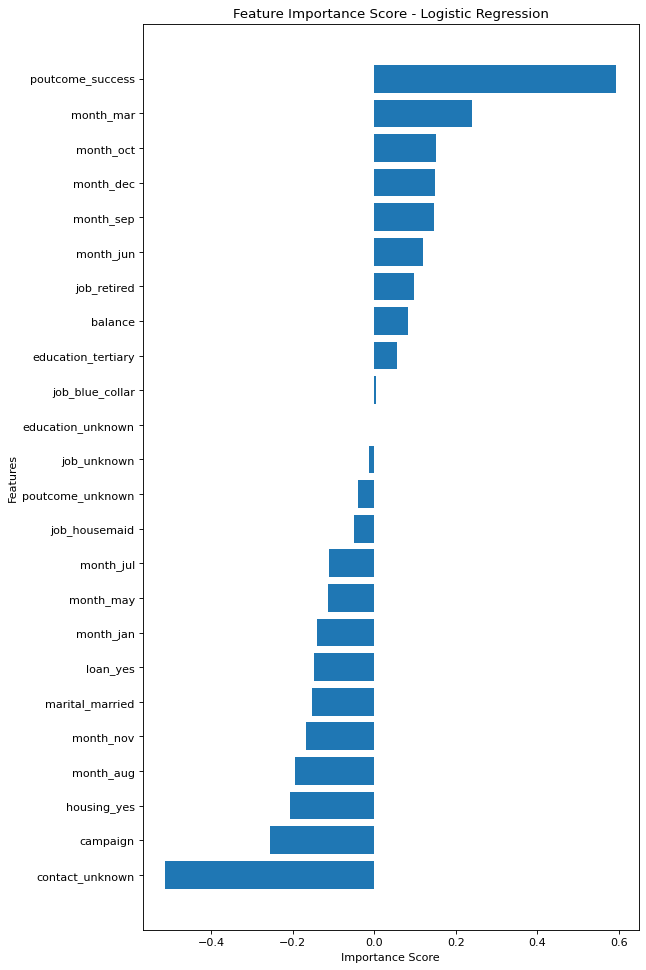

In [ ]:
num = np.min([50, len(X1.columns)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

By Taking top most important features from above figure to train the model

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

In [ ]:
X_LR_imp= term_df[[ 'balance','education_tertiary','job_retired', 'month_dec', 
       'month_jun', 'month_mar',  'month_oct',
       'month_sep', 'poutcome_success','job_blue_collar',
'education_unknown']]
y_LR_imp = term_df['deposit']


X_LR_imp_rest, X_LR_imp_test, y_LR_imp_rest, y_LR_imp_test = train_test_split(X_LR_imp, y_LR_imp, test_size=0.2)
X_LR_imp_train, X_LR_imp_cv, y_LR_imp_train, y_LR_imp_cv = train_test_split(X_LR_imp_rest, y_LR_imp_rest, test_size=0.2)

#Normalise the predictors

from sklearn.preprocessing import StandardScaler
sc_LR_imp= StandardScaler()
X_LR_imp_train = sc_LR_imp.fit_transform(X_LR_imp_train)
X_LR_imp_test = sc_LR_imp.transform(X_LR_imp_test)
X_LR_imp_cv = sc_LR_imp.transform(X_LR_imp_cv)


In [ ]:
#Simple Logistic Regression with Lasso Regularization

LR= LogisticRegression(C = 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear',random_state=43)

LR.fit(X_LR_imp_train,y_LR_imp_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=43, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_LR_imp_train_preds = LR.predict_proba(X_LR_imp_train)
y_LR_imp_valid_preds = LR.predict_proba(X_LR_imp_cv)

print("AUC score for training data ", roc_auc_score(y_train, y_train_preds[:,1]))
print("AUC score for validating data ", roc_auc_score(y_cv, y_valid_preds[:,1]))

AUC score for training data  0.648120864464399
AUC score for validating data  0.6576926320240947


**Summary** :

* Does regularization help?

Although Regularization not helped that much in Logistic Regression by using Lasso but still we can see there is minor difference in AUC Score of 1%  after modelling with regularisation

* Are any model assumptions violated?

yes before I took all features to train the model but after training the model only 9 features are important

* Which independent variables are significant?

poutcome_success	0.592663

month_mar	0.239697
month_oct	0.151557
month_dec	0.149255
month_sep	0.147282
month_jun	0.118848
job_retired	0.098422
balance	0.081840
education_tertiary	0.055271
job_blue_collar	0.004324


#**Decision Tree**

Decision trees works through the data to decide if one action occurs, what will then be the result of a "yes" and a "no". It works each data making the decision of which path to take based on the answer. Because of this decision making process, this algorithm has no assumptions about the structure of the data, but instead decides on the path to take through each decision the algorithm performs.

Training and evaluating Decision Tree model performance:

**Without Hyperparameter in Decision Tree shows Overfitting**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_train_preds = tree.predict_proba(X_train)
y_valid_preds = tree.predict_proba(X_cv)



print('Decision Tree')
print("AUC score for training data ", roc_auc_score(y_train, y_train_preds[:,1]))
print("AUC score for validating data ", roc_auc_score(y_cv, y_valid_preds[:,1]))

Decision Tree
AUC score for training data  0.999920039683601
AUC score for validating data  0.6355583600346613


**With Hyperparameter in Decision Tree to overcome Overfitting**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#used hyperparameter max_depth in model
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_train_preds = tree.predict_proba(X_train)
y_valid_preds = tree.predict_proba(X_cv)



print('Decision Tree')
print("AUC score for training data ", roc_auc_score(y_train, y_train_preds[:,1]))
print("AUC score for validating data ", roc_auc_score(y_cv, y_valid_preds[:,1]))


Decision Tree
AUC score for training data  0.8253625785404604
AUC score for validating data  0.7226109868407795


###**Feature importance in Decision Tree**

In [ ]:
# Print the name and gini importance of each feature

#took refrence from https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/

for feature in zip(X_label, tree.feature_importances_):
    print(feature)

('balance', 0.19675270135595152)
('housing_yes', 0.06127845875524002)
('loan_yes', 0.028668940967971093)
('campaign', 0.05780573215732127)
('job_blue_collar', 0.008601998605258924)
('job_housemaid', 0.006336081178305588)
('job_retired', 0.00924821888958876)
('job_unknown', 0.005009982826240205)
('marital_married', 0.01797596059666864)
('education_tertiary', 0.010410590973608155)
('education_unknown', 0.004424263851870125)
('month_aug', 0.02851637653346883)
('month_dec', 0.00175355585986654)
('month_jan', 0.016965492188740487)
('month_jul', 0.029344478323815416)
('month_jun', 0.01665734217049376)
('month_mar', 0.012547262534882666)
('month_may', 0.01985495389081244)
('month_nov', 0.016885219727827357)
('month_oct', 0.011515434609456577)
('month_sep', 0.008613177523594523)
('poutcome_success', 0.2562181475134629)
('poutcome_unknown', 0.028060234215002384)
('contact_unknown', 0.14655539475055177)


* **In  multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

The scores above are the importance scores for each variable. There are two things to note. First, all the importance scores add up to 100%. Second, balance and job_housemaid are far more important than the other features. Combined, balance and job_housemaid have an importance of ~0.50! Clearly these are the most importance features.

In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(tree, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=10,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort='deprecated',
                                                 random_state=42,
                                                 splitter='best'),
                max_features=None, norm_order=1, prefit=False, threshold=0.15

**Create A Data Subset With Only The Most Important Features and Train the model**

In [ ]:
#selecting most important features for training the Decison Tree model

X_dt_imp = term_df[[ 'balance', 'housing_yes','loan_yes',
       'campaign', 'poutcome_success', 
       'contact_unknown']]
y_dt_imp = term_df['deposit']


X_dt_imp_rest, X_dt_imp_test, y_dt_imp_rest, y_dt_imp_test = train_test_split(X_dt_imp, y_dt_imp, test_size=0.2)
X_dt_imp_train, X_dt_imp_cv, y_dt_imp_train, y_dt_imp_cv = train_test_split(X_dt_imp_rest, y_dt_imp_rest, test_size=0.2)


#used hyperparameter max_depth in model
tree_imp = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree_imp.fit(X_dt_imp_train, y_dt_imp_train)

y_dt_imp_train_preds = tree_imp.predict_proba(X_dt_imp_train)
y_dt_imp_valid_preds = tree_imp.predict_proba(X_dt_imp_cv)



print('Decision Tree')
print("AUC score for training data ", roc_auc_score(y_dt_imp_train, y_dt_imp_train_preds[:,1]))
print("AUC score for validating data ", roc_auc_score(y_dt_imp_cv, y_dt_imp_valid_preds[:,1]))


Decision Tree
AUC score for training data  0.8010122037183892
AUC score for validating data  0.7037827675873217


**Summary**

* Does regularization help?

Yes.From the above we can see, Decision Tree shows overfitting without any hyperparameter. To overcome this I used Max_Depth hyperparameter to avoid overfitting and give ROC of 82% for the training data which is quite good.

* Which independent variables are significant?
Balance
Housing
loan
Campaign
Contact Unknown
poutcome_success


* Which hyperparameters are important?
Maxdepth =10



#**Random Forest**

Random forest works like a decision tree algorithm but it performs various decision tree analysis on the dataset as a whole. That is, it is the bigger version of the decision tree; a forest is bigger than a tree, you can think of it that way. Random forest takes random samples of trees and it works faster than the decision tree algorithm.

Training and evaluating Random Forest model performance:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 10, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_train_preds = rf.predict_proba(X_train)
y_valid_preds = rf.predict_proba(X_cv)


print('Random Forest')
print("AUC score for training data ", roc_auc_score(y_train, y_train_preds[:,1]))
print("AUC score for validating data ", roc_auc_score(y_cv, y_valid_preds[:,1]))


Random Forest
AUC score for training data  0.7795609710588493
AUC score for validating data  0.7611937760715797


###**Most Important Features in Random Forest**

*As per above following are the most important features for Random Forest

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_label,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()
#gini score of the feature

,importance
poutcome_success,0.259523
contact_unknown,0.176808
poutcome_unknown,0.086360
housing_yes,0.078516
balance,0.065940


In [ ]:
 #To see which features are important we can use get_support method on the fitted model.
sel.get_support()



array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True])

In [ ]:
#selecting most important features for training the Random Forest model

X_rf_imp = term_df[[ 'balance','contact_unknown', 'poutcome_success','poutcome_unknown','housing_yes' ]]
y_rf_imp = term_df['deposit']


X_rf_imp_rest, X_rf_imp_test, y_rf_imp_rest, y_rf_imp_test = train_test_split(X_rf_imp, y_rf_imp, test_size=0.2)
X_rf_imp_train, X_rf_imp_cv, y_rf_imp_train, y_rf_imp_cv = train_test_split(X_rf_imp_rest, y_rf_imp_rest, test_size=0.2)


#used hyperparameter max_depth in model
rf_imp = RandomForestClassifier(n_estimators = 10,random_state=20)
rf_imp.fit(X_rf_imp_train, y_rf_imp_train)

y_rf_imp_train_preds = rf_imp.predict_proba(X_rf_imp_train)
y_rf_imp_valid_preds = rf_imp.predict_proba(X_rf_imp_cv)



print('Random Forest')
print("AUC score for training data ", roc_auc_score(y_rf_imp_train, y_rf_imp_train_preds[:,1]))
print("AUC score for validating data ", roc_auc_score(y_rf_imp_cv, y_rf_imp_valid_preds[:,1]))

Random Forest
AUC score for training data  0.958928431877108
AUC score for validating data  0.6245390295637174


**Summary:**

As we can see Random Forest provide a pretty good AUC score of 95% after Hyperparameter tuning in Random Forest and adding most important features to train the model.


 Which hyperparameters are important?

n_estimators is a hyperparameter in the RandomForestClassifier that depending on the numbers of estimators entered the model can be overfitted, good compromise or underfitted. n_estimators is used for fine tuning the models in order to fit the training data. max_depth is also another hyperparameter; it controls the depth of the machine learning algorithm model.

##Analysis of Baseline Models

We will utilize the AUC to evaluate the best model. This is a good data science performance metric for picking the best model since it captures the trade off between the true positive and false positive and does not require selecting a threshold.

I picked AUC (area under the ROC curve) as a performance indicator. The reason I chose this over other indicators such as precision and accuracy is that it measures the relationshio between true positives and false positives in our data in order to derive a score that depicts that. Also, AUC is widely used and an easier metric to compare many models with

All the algorithms have similar training AUC's, but the ones that stood out is decision tree (DT) . I would choose Decision tree as the best metric to use because it has a higher auc (0.82) than the other algorithms. At a threshold of 0.5, an auc of 0.82 is good as it signifies that it is more than just a random guess towards a positive class and it is close to 1 which is great!

### **Variance and Bias**

In the case of random forest, we can see the model has high variance because the training and cross-validation scores show data points which are very spread out from one another. High variance would cause an algorithm to model the noise in the training set (overfitting).

Depending on the learning curve, there are a few strategies we can employ to improve the models

High Variance:
- Add more samples
- Add regularization
- Reduce number of features
- Decrease model complexity
- Add better features
- Change model architecture

High Bias:
- Add new features
- Increase model complexity
- Reduce regularization
- Change model architecture

In [ ]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train, y_train)

y_train_preds = rf.predict_proba(X_train)[:,1]
y_valid_preds = rf.predict_proba(X_cv)[:,1]
y_test_preds = rf.predict_proba(X_test)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_test_base_auc = roc_auc_score(y_test, y_test_preds)
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_cv, y_valid_preds)

print('Testing AUC:%.3f'%(rf_test_base_auc))
print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))


print('Optimized Random Forest')
y_test_preds_random = rf_random.best_estimator_.predict_proba(X_test)[:,1]
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_cv)[:,1]

rf_test_opt_auc = roc_auc_score(y_test, y_test_preds_random)
rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_cv, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_test_opt_auc))
print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Testing AUC:0.757
Training AUC:0.783
Validation AUC:0.751
Optimized Random Forest
Training AUC:0.795
Training AUC:0.806
Validation AUC:0.793


#**Picking the best model**

I picked Random Forest optimized version as my best model because the optimized version has a higher auc metric than the baseline model of  Random Forest. 

#**Conclusion**
Through this project, we created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was Random Forest classifier with optimized hyperparameters. The model's performance is 95.8%.

We should focus on targeting customers with outcome of the previous marketing campaign,housing loan and balance as they are high importance features for the model and business.

Therefore, we save time and money knowing the characteristics of clients we should market to and that will lead to increased growth and revenue.



#**References:**

* https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f

* https://www.kaggle.com/henriqueyamahata/bank-marketing-classification-roc-f1-recall





**Copyright 2020 Shalini Chandra**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files("the software") to deal in the software without any restriction, including without limitation the rights to use, copy, modify, ,erge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
 The above copyright notice and this permisssion notice shall be included in all copies or substantial portions of the Software.